In [47]:
import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns

%config InlineBackend.figure_format = 'svg'
%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 10,3

Populating the interactive namespace from numpy and matplotlib


In [11]:
df = pd.read_csv('Desktop/video_games_sales.csv')

df.shape

(16719, 16)

In [15]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


(16719, 16)

In [24]:
df = df.dropna()
df.shape

(6825, 16)

In [25]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [26]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')


<ipython-input-26-b977f0182e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Score'] = df.User_Score.astype('float64')
<ipython-input-26-b977f0182e57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_Release'] = df.Year_of_Release.astype('int64')
<ipython-input-26-b977f0182e57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


In [31]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre',
              'Global_Sales', 'Critic_Score', 'Critic_Count',
              'User_Score', 'User_Count', 'Rating']

df[useful_cols].head(10)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32,87.0,80,8.4,594,E
11,Mario Kart DS,DS,2005,Racing,23.21,91.0,64,8.6,464,E
13,Wii Fit,Wii,2007,Sports,22.70,80.0,63,7.7,146,E
14,Kinect Adventures!,X360,2010,Misc,21.81,61.0,45,6.3,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.79,80.0,33,7.4,52,E


In [32]:
sales = [x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [38]:
df1 = df[[x for x in df.columns if 'Sales' in x] \
         + ["Year_of_Release"]]\
        .groupby("Year_of_Release").sum()

In [39]:
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1985,0.00,0.03,0.00,0.01,0.03
1988,0.00,0.02,0.00,0.01,0.03
1992,0.02,0.00,0.00,0.00,0.03
1994,0.39,0.26,0.53,0.08,1.27
1996,7.91,6.88,4.06,1.24,20.10


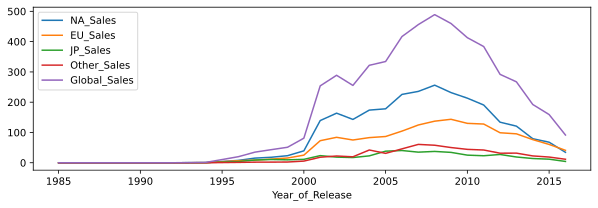

In [49]:
df1.plot(); # trands 

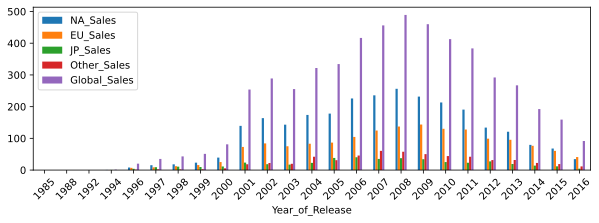

In [50]:
df1.plot(kind='bar', rot = 45);

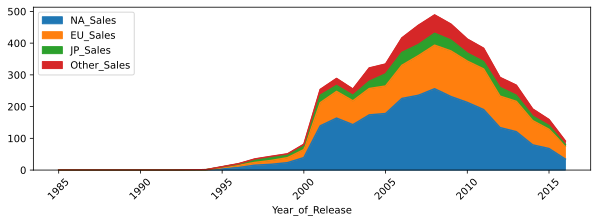

In [58]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=True);

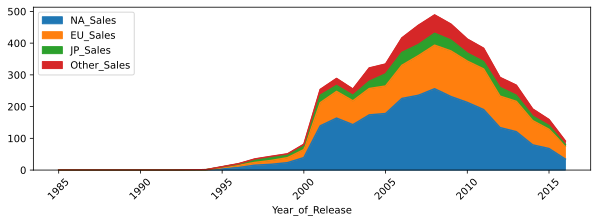

In [59]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=True);

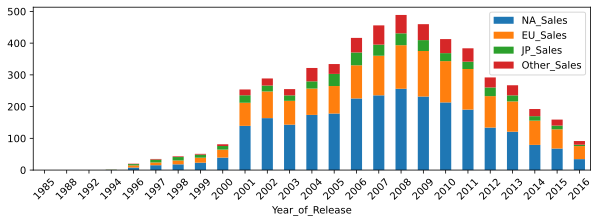

In [55]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='bar', rot=45, stacked=True);

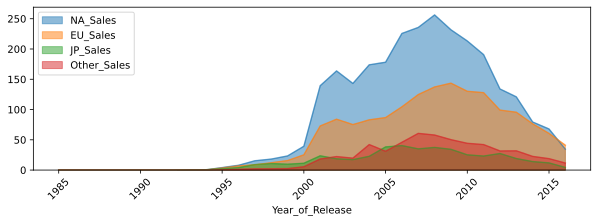

In [60]:
df1[list(filter(lambda x: x != 'Global_Sales', df1.columns))]\
    .plot(kind='area', rot=45, stacked=False);

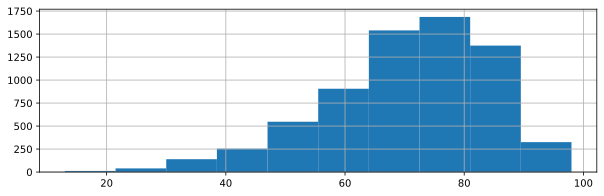

In [62]:
df.Critic_Score.hist(); # series -> hist

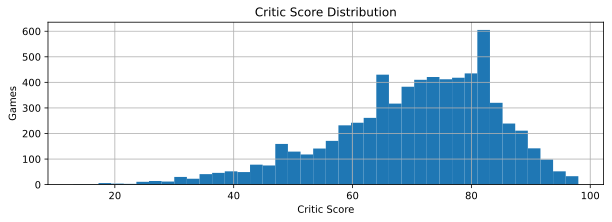

In [69]:
ax = df.Critic_Score.hist(bins=40) # number of bars
ax.set_title("Critic Score Distribution")
ax.set_xlabel("Critic Score")
ax.set_ylabel("Games"); # axes

In [72]:
top_developers_df = df.groupby("Developer")[["Global_Sales"]].sum()\
    .sort_values("Global_Sales", ascending=False).head(10)

top_developers_df

,Global_Sales
Developer,
Nintendo,529.90
EA Sports,145.93
EA Canada,131.46
Rockstar North,119.47
Capcom,114.52
Treyarch,101.37
Ubisoft Montreal,101.24
Ubisoft,94.53
EA Tiburon,79.77


In [76]:
top_developers_df.style.bar() #table style w barcharts

,Global_Sales
Developer,
Nintendo,529.900000
EA Sports,145.930000
EA Canada,131.460000
Rockstar North,119.470000
Capcom,114.520000
Treyarch,101.370000
Ubisoft Montreal,101.240000
Ubisoft,94.530000
EA Tiburon,79.770000


In [78]:
top_developers_df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Global_Sales</th>\n    </tr>\n    <tr>\n      <th>Developer</th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Nintendo</th>\n      <td>529.90</td>\n    </tr>\n    <tr>\n      <th>EA Sports</th>\n      <td>145.93</td>\n    </tr>\n    <tr>\n      <th>EA Canada</th>\n      <td>131.46</td>\n    </tr>\n    <tr>\n      <th>Rockstar North</th>\n      <td>119.47</td>\n    </tr>\n    <tr>\n      <th>Capcom</th>\n      <td>114.52</td>\n    </tr>\n    <tr>\n      <th>Treyarch</th>\n      <td>101.37</td>\n    </tr>\n    <tr>\n      <th>Ubisoft Montreal</th>\n      <td>101.24</td>\n    </tr>\n    <tr>\n      <th>Ubisoft</th>\n      <td>94.53</td>\n    </tr>\n    <tr>\n      <th>EA Tiburon</th>\n      <td>79.77</td>\n    </tr>\n    <tr>\n      <th>Infinity Ward</th>\n      <td>77.56</td>\n    </tr>\n  </tbody>\n</table>'

In [79]:
import seaborn as sns

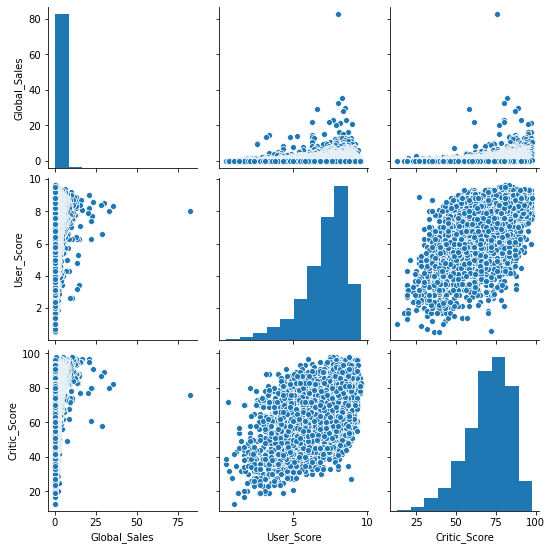

In [81]:
%config InlineBackend.figure_format = 'png'
sns_plot = sns.pairplot(df[['Global_Sales', 'User_Score', 'Critic_Score']]);
sns_plot.savefig('pairplot.png')

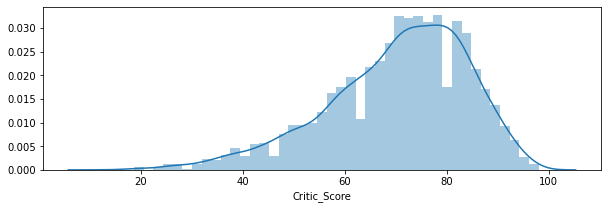

In [84]:
%config InlineBlock.figure_format = 'svg'
sns.distplot(df.Critic_Score);

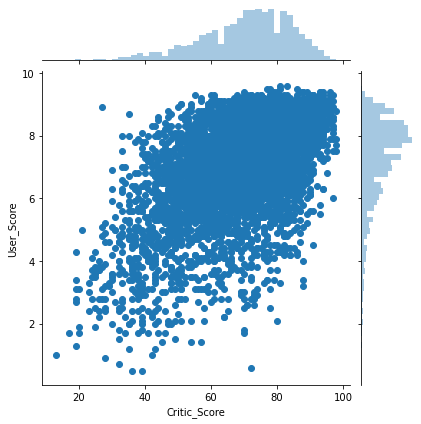

In [87]:
sns.jointplot(x="Critic_Score", y='User_Score', data=df, kind="scatter");

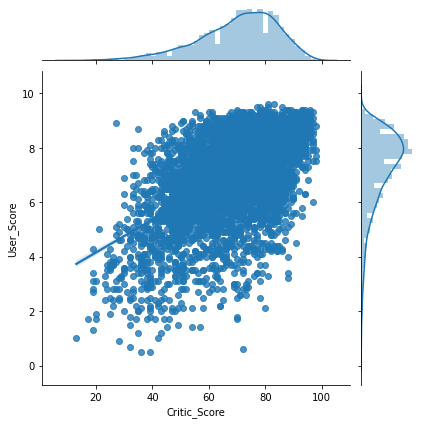

In [95]:
sns.jointplot(x="Critic_Score", y='User_Score', data=df, kind="reg");

In [90]:
df.Platform.value_counts().head(5).index.values

array(['PS2', 'X360', 'PS3', 'PC', 'XB'], dtype=object)

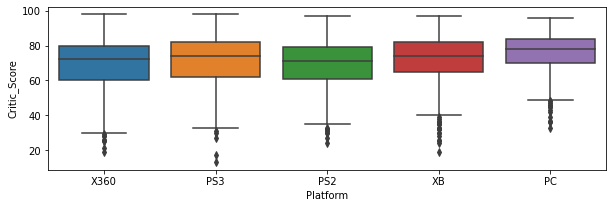

In [102]:
top_platform = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(x='Platform', y='Critic_Score', data=df[df.Platform.isin(top_platform)]);